### Training eines CNN mit MNIST

Im Folgenden soll Convolutional Neural Network (CNN) mit den MNIST-Daten trainiert und evaluiert werden. 

- Lesen Sie die MNIST-Daten ein und führen Sie ein analoges Preprocessing wie im Kapitel "Neuronale Netze 2" (Beispiel Fashion-MNIST) durch. Splitten Sie ebenfalls analog in Trainig-, Validierungs-, und Testset auf.

- Legen Sie dazu folgendes CNN an (siehe Abbildung unten, nutzen Sie die Aktivierung ReLu statt Sigmoid bei
den Convolution-Layern):
    - Conv-Layer 1: F=5, S=1, L=6, A='ReLu', padding='valid' ; https://keras.io/layers/convolutional/#conv2d
    - Pool-Layer 1: F=2, S=2 : 
    - Conv-Layer 2: F=5, S=1, L=12, A='ReLu', padding='valid' ; https://keras.io/layers/pooling/#maxpooling2d
    - Pool-Layer 2: F=2, S=2
    - Flatten-Layer ; https://keras.io/layers/core/#flatten 
    - Softmax-Regression mit K=10 Klassen
    
<img src="conv_net_exercise.png" height="100" width="600"/>

- Trainieren Sie die Netz.
- Plotten Sie die Filterkerne des ersten Conv-Layers.

In [4]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) =  mnist.load_data()
# (Batch_size,height, width, channels)
X_train = X_train.reshape(-1,28,28,1)
X_test  = X_test.reshape(-1,28,28,1)


In [9]:
X_train = X_train.astype(np.float32)/255.0
y_train = y_train.astype(np.int32)

X_test = X_test.astype(np.float32)/255.0
y_test = y_test.astype(np.int32)

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

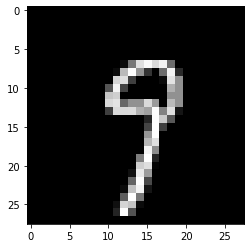

In [5]:
#X_train.shape
plt.imshow(X_train[1500,:,:,0],cmap='gray')

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten

model = Sequential()
model.add(Conv2D(6, (5,5), strides=1, padding='valid', activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Conv2D(12, (5,5), strides=1, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

W0625 12:27:05.605943 140103130330944 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 12:27:05.611789 140103130330944 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 12:27:05.616689 140103130330944 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 12:27:05.632135 140103130330944 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 12)          1812      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1930      
Total params: 3,898
Trainable params: 3,898
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

W0625 12:37:19.997632 140103130330944 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 12:37:20.003544 140103130330944 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data= (X_valid,y_valid))

W0625 12:37:37.844130 140103130330944 deprecation.py:323] From /opt/tljh/user/lib/python3.6/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0625 12:37:37.917403 140103130330944 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0625 12:37:37.924900 140103130330944 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0625 12:37:37.987305 140103130330944 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 16s 291us/step - loss: 0.3061 - sparse_categorical_accuracy: 0.9102 - val_loss: 0.1302 - val_sparse_categorical_accuracy: 0.9616
Epoch 2/5
55000/55000 [==============================] - 16s 283us/step - loss: 0.1005 - sparse_categorical_accuracy: 0.9697 - val_loss: 0.0806 - val_sparse_categorical_accuracy: 0.9760
Epoch 3/5
55000/55000 [==============================] - 14s 248us/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9768 - val_loss: 0.0736 - val_sparse_categorical_accuracy: 0.9780
Epoch 4/5
55000/55000 [==============================] - 13s 232us/step - loss: 0.0644 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.0664 - val_sparse_categorical_accuracy: 0.9804
Epoch 5/5
55000/55000 [==============================] - 13s 233us/step - loss: 0.0575 - sparse_categorical_accuracy: 0.9831 - val_loss: 0.0682 - val_sparse_categorical_accuracy: 0.9810


In [ ]:
import matplotlib.pyplot as plt

filters = model.layers[2].get_weights()[0]


plt.figure(figsize=(20,10))
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(filters[:,:,0,k],cmap='gray')
    plt.colorbar()

###  Votrainierte CNNs am Beispiel VGG16

- Lesen Sie wie in der Vorlesung gezeigt das VGG16 Netz ein (dieses wurde auf die Daten von ImageNet trainiert).

In [ ]:
from keras.applications import VGG16
vgg16_model = VGG16()

vgg16_model.summary()

Using TensorFlow backend.
W0625 12:43:00.001167 140344695449408 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 12:43:00.005621 140344695449408 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 12:43:00.011118 140344695449408 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 12:43:00.042675 140344695449408 module_wrapper.py:139] From /opt/tljh/user/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0625 12:43:02.948788 14034469544

In [ ]:
224**2*3


In [ ]:
from sys import getsizeof
getsizeof(vgg16_model)

- Lesen Sie ein Bild Test-Bild ein (test_img.png) und führen Sie folgende Operationen durch:
    - auf die Dimension (1,height,width,channels) reshapen
    - mittels preprocess_input ein Preprocessing durchführen

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input



# load an image from file (Falls mit plt.imread eingelesen muss mit 255
# multipliziert werden)
img = load_img('test_img.png', target_size=(224, 224))
img = img_to_array(img)

img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
img = preprocess_input(img)

In [ ]:
from keras.applications.vgg16 import decode_predictions

label = decode_predictions(vgg16_model.predict(img))
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))
decode_predictions(vgg16_model.predict(img))

- Visualisieren Sie alle Feature Maps des ersten Convolution-Blocks, welche beim obigen Test-Bild entstehen.
    - Erzeugen Sie dazu ein neues Model, welches nur den ersten Convolution-Block beinhaltet. 
    - Besetzen Sie die Gewichte mit denen, des oben eingelesen VGG16-Models (Option weights = vgg16_model.layers[1].get_weights() ) 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten

my_vgg16 = Sequential()
my_vgg16.add(Conv2D(64, (3,3), strides=(1, 1), padding='valid', activation='relu',input_shape=(224,224,3),weights=vgg16_model.layers[1].get_weights()))

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for k in range(64):
    plt.subplot(8,8,k+1)
    plt.imshow(my_vgg16.predict(img)[0,:,:,k])

    plt.colorbar()

- Visualisieren Sie die 64 Filterkerne der ersten Convolution des VGG16 Netzes (Mitteln Sie über die drei Farbkanäle).

In [ ]:
import numpy as np
filters = np.mean(vgg16_model.layers[1].get_weights()[0],axis=2)

In [ ]:
plt.figure(figsize=(10,10))
for k in range(64):
    plt.subplot(8,8,k+1)
    plt.imshow(filters[:,:,k],cmap='gray')
    plt.colorbar()